<a href="https://colab.research.google.com/github/sdiaz8/sdiaz8/blob/main/Time%20Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load data and libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
data = pd.read_csv('/content/multiTimeline.csv')

In [ ]:
#Check data
data.describe()

,Diet,Gym,Finance
count,168.000000,168.000000,168.000000
mean,49.642857,34.690476,47.148810
std,8.033080,8.134316,4.972547
min,34.000000,22.000000,38.000000
25%,44.000000,28.000000,44.000000
50%,48.500000,32.500000,46.000000
75%,53.000000,41.000000,50.000000
max,100.000000,58.000000,73.000000


In [ ]:
data.shape

(168, 4)

In [ ]:
data.head()

,Month,Diet,Gym,Finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Month    168 non-null    object
 1   Diet     168 non-null    int64 
 2   Gym      168 non-null    int64 
 3   Finance  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


In [ ]:
#Index Month and change month to DateTime
data['Month']= pd.to_datetime(data['Month'])
data.set_index("Month", inplace=True)
data.head()

,Diet,Gym,Finance
Month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2004-01-01 to 2017-12-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Diet     168 non-null    int64
 1   Gym      168 non-null    int64
 2   Finance  168 non-null    int64
dtypes: int64(3)
memory usage: 5.2 KB


Text(0, 0.5, 'Value')

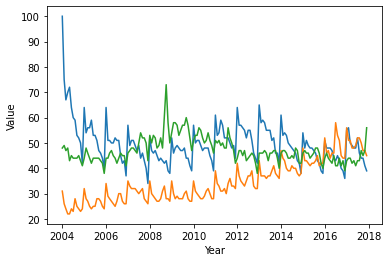

In [ ]:
#Visualize Data
plt.plot(data)
plt.xlabel("Year")
plt.ylabel('Value')

Text(0.5, 1.0, 'Diet')

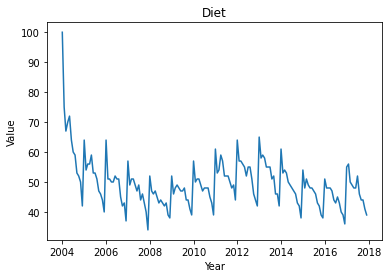

In [ ]:
#Visualize Diet
plt.plot(data['Diet'])
plt.xlabel("Year")
plt.ylabel('Value')
plt.title('Diet')

Text(0.5, 1.0, 'Diet')

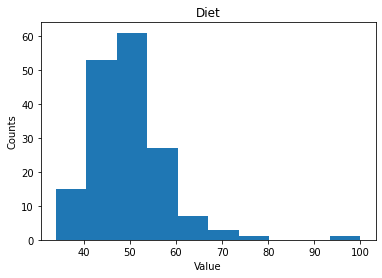

In [ ]:
plt.hist(data['Diet'])
plt.xlabel("Value")
plt.ylabel('Counts')
plt.title('Diet')

In [ ]:
#Rolling averages for diet and gym (6 month window)
data['diet_r'] = data['Diet'].rolling(window=6).mean()
data['gym_r'] = data['Gym'].rolling(window=6).mean()
data.head(10)

,Diet,Gym,Finance,diet_r,gym_r
Month,,,,,
2004-01-01,100,31,48,NaN,NaN
2004-02-01,75,26,49,NaN,NaN
2004-03-01,67,24,47,NaN,NaN
2004-04-01,70,22,48,NaN,NaN
2004-05-01,72,22,43,NaN,NaN
2004-06-01,64,24,45,74.666667,24.833333
2004-07-01,60,23,44,68.000000,23.500000
2004-08-01,59,28,44,65.333333,23.833333
2004-09-01,53,25,44,63.000000,24.000000


Text(0.5, 1.0, 'Trend of Diet and Gym')

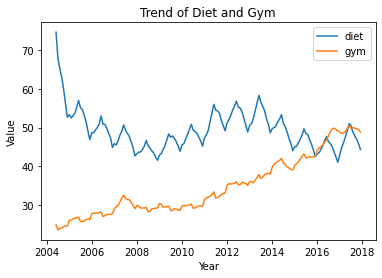

In [ ]:
#Trend for diet and gym using 6 month rolling averages
plt.plot(data['diet_r'])
plt.plot(data['gym_r'])
plt.xlabel("Year")
plt.ylabel('Value')
plt.legend(['diet','gym'])
plt.title('Trend of Diet and Gym')

In [ ]:
#correlation between variables
data.corr()

,Diet,Gym,Finance,diet_r,gym_r
Diet,1.000000,-0.100764,-0.034639,0.590552,-0.168777
Gym,-0.100764,1.000000,-0.284279,-0.276773,0.939944
Finance,-0.034639,-0.284279,1.000000,-0.237696,-0.331801
diet_r,0.590552,-0.276773,-0.237696,1.000000,-0.288932
gym_r,-0.168777,0.939944,-0.331801,-0.288932,1.000000


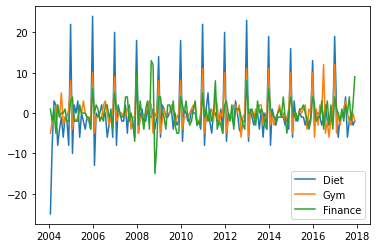

In [ ]:
#First-Order Differences
data_first = data.diff(axis = 0, periods = 1)
plt.plot(data_first['Diet'])
plt.plot(data_first['Gym'])
plt.plot(data_first['Finance'])
plt.legend(['Diet','Gym','Finance'])

In [ ]:
data_first.corr()

,Diet,Gym,Finance,diet_r,gym_r
Diet,1.000000,0.758707,0.373828,0.364759,0.441685
Gym,0.758707,1.000000,0.301111,0.194724,0.434447
Finance,0.373828,0.301111,1.000000,0.196644,0.188855
diet_r,0.364759,0.194724,0.196644,1.000000,0.516218
gym_r,0.441685,0.434447,0.188855,0.516218,1.000000


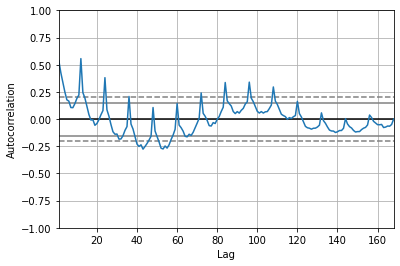

In [ ]:
#Autocorrelation Plotting
pd.plotting.autocorrelation_plot(data['Diet'])

#Dotted Line Representation
The dotted lines mark the 95% confidence interval.  If at any point the line is above or below the dotted lines, we can state that the correlation between diet and time(month) is significant.

#Seasonality
The seasonality in diet is that after the first month (January) the values for diet are at an all time high.  The values steadly decrease until July-August, after that the values steadly increase until hitting its peak in January.